In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

reg = LinearRegression()
data = pd.read_csv('card.csv')
clean = data.dropna()

#### Part A

Text(0.5, 1.0, 'Histogram of Wage')

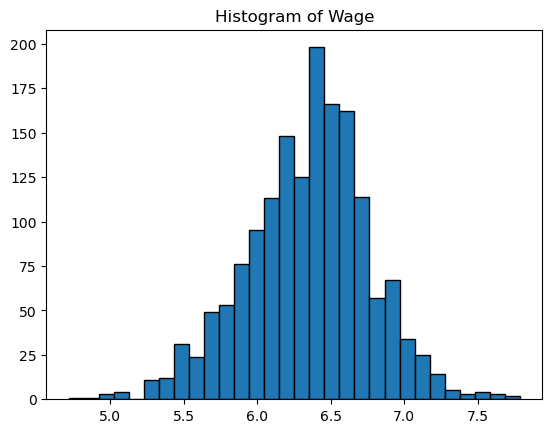

In [88]:
ln_wage = np.log(clean['wage'])

plt.hist(ln_wage, bins=30, edgecolor='black')
plt.title('Histogram of Wage')

#### Part B

In [116]:
data['exper^2'] = data['exper'] ** 2
controls = data[['exper', 'exper^2', 'black', 'smsa', 'south', 'smsa66', 'reg662', 'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669']]

educ = clean['educ']
X_a = educ.to_frame(name='educ').join(controls)
X_a = sm.add_constant(X_a)
model = sm.OLS(ln_wage, X_a).fit()

print(f"The coefficient for β1 (educ) is: {model.params['educ']:.4f}")
print(f"The standard error for β1 (educ) is: {model.bse['educ']:.4f}")

The coefficient for β1 (educ) is: 0.0774
The standard error for β1 (educ) is: 0.0051


#### Part C

In [ ]:
nearc4 = clean[['nearc4']]
educ = clean['educ']
reg.fit(nearc4, educ)

print(f"First stage coefficient for γ1 (nearc4) on educ is: {reg.coef_[0]:.4f}")

controls_c = clean[['nearc4']].join(controls)
reg.fit(controls_c, educ)

print(f"Full model coefficient for γ1 (nearc4) on educ is: {reg.coef_[0]:.4f}")


First stage coefficient for γ1 (nearc4) on educ is: 0.5018
Full model coefficient for γ1 (nearc4) on educ is: 0.3197


The Instrument Relevance condition indicates that the chosen IV (nearc4) must be correlated with the explanatory variable (educ) but not correlated with the omitted variables (rest of the controls).
Given the results of the analysis where the estimate of the IV is very different between the First Stage Regression and the Full Model, this indicates that the IV is correlated with the omitted variables and is thus a poor IV.

#### Part D

In [ ]:
nearc4 = clean[['nearc4']]
educ = clean['educ']

X_first_D = nearc4.join(controls)

# First stage regression using statsmodels to get fitted values
X_first_constant_D = sm.add_constant(X_first_D)
model_first_D = sm.OLS(educ, X_first_constant_D).fit()

# Fitted values from the first stage regression
educ_hat = model_first_D.fittedvalues

# Second stage regression
X_second_D = educ_hat.to_frame(name='educ_hat').join(controls)
X_second_constant_D = sm.add_constant(X_second_D)  
model_second_D = sm.OLS(ln_wage, X_second_constant_D).fit()

beta_1 = model_second_D.params['educ_hat']
beta_1_se = model_second_D.bse['educ_hat']

print(f"IV estimate for β1 (educ) with nearc4 as the IV is: {beta_1:.4f}")
print(f"Standard error for β1 (educ) with nearc4 as the IV is: {beta_1_se:.4f}")

IV estimate for β1 (educ) with nearc4 as the IV is: 0.0331
Standard error for β1 (educ) with nearc4 as the IV is: 0.0768


#### Part E

In [119]:
nearc4 = clean[['nearc4']]
IQ = clean['IQ']

reg.fit(nearc4, IQ)
print(f"The coefficient for π1 (nearc4) on IQ is: {reg.coef_[0]:.4f}")

controls_e = nearc4.join(controls)
reg.fit(controls_e, IQ)
print(f"The coefficient for π1 (nearc4) on IQ with controls is: {reg.coef_[0]:.4f}")

The coefficient for π1 (nearc4) on IQ is: 2.3639
The coefficient for π1 (nearc4) on IQ with controls is: 0.2209


Similar to the previous IV analysis in part C, this IV (nearc4) on IQ appears to fail relevance condition considering that its estimation is not independent from the error term (controls). This indicates that there is an omitted variable bias problem on the first stage regression, thus indicating that the exogeneity assumption does not hold.

#### Part F

In [108]:
X_first_D = nearc4.join(controls)

# First stage regression using statsmodels to get fitted values
X_first_constant_D = sm.add_constant(X_first_D)
model_first_D = sm.OLS(IQ, X_first_constant_D).fit()

# Fitted values from the first stage regression
IQ_hat = model_first_D.fittedvalues

# Second stage regression
X_second_D = IQ_hat.to_frame(name='IQ_hat').join(controls)
X_second_constant_D = sm.add_constant(X_second_D)  
model_second_D = sm.OLS(ln_wage, X_second_constant_D).fit()

beta_1 = model_second_D.params['IQ_hat']
beta_1_se = model_second_D.bse['IQ_hat']

print(f"IV estimate for β1 (IQ) with nearc4 as the IV is: {beta_1:.4f}")
print(f"Standard error for β1 (IQ) with nearc4 as the IV is: {beta_1_se:.4f}")

IV estimate for β1 (IQ) with nearc4 as the IV is: 0.0479
Standard error for β1 (IQ) with nearc4 as the IV is: 0.1111


β1 for (f) is a lot smaller than β1 for (b) and (d). 

#### Part G

#### Part H

#### Part I

In [132]:
nearc4 = clean[['nearc4']]
nearc2 = clean[['nearc2']]
educ = clean['educ']


# FIXED: Use pd.concat instead of + for joining DataFrames
X_first_f = nearc4.join(nearc2).join(controls)
X_first_constant_f = sm.add_constant(X_first_f)
model_first_f = sm.OLS(educ, X_first_constant_f).fit()

educ_hat_f = model_first_f.fittedvalues

X_second_f = educ_hat_f.to_frame(name='educ_hat').join(controls)
X_second_constant_f = sm.add_constant(X_second_f)
model_second_f = sm.OLS(ln_wage, X_second_constant_f).fit()

beta_1_f = model_second_f.params['educ_hat']
beta_1_se_f = model_second_f.bse['educ_hat']

print(f"IV estimate for β1 (educ) with nearc4 and nearc2 as the IVs is: {beta_1_f:.4f}")
print(f"Standard error for β1 (educ) with nearc4 and nearc2 as the IVs is: {beta_1_se_f:.4f}")

IV estimate for β1 (educ) with nearc4 and nearc2 as the IVs is: 0.0773
Standard error for β1 (educ) with nearc4 and nearc2 as the IVs is: 0.0731
